In [4]:
from pandas import read_csv
import numpy as np
from hnc.hnc.constants import *

import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['lines.linewidth'] = 2.2
mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['lines.markersize'] = 8
mpl.rcParams['font.sans-serif'] = ['Arial', 'Tahoma', 'DejaVu Sans', 'Lucida Grande', 'Verdana']
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.color'] = '#636363'
mpl.rcParams['grid.alpha'] = 0.12
mpl.rcParams['grid.linewidth'] = 0.7
mpl.rcParams['grid.linestyle'] = '-'
mpl.rcParams['axes.prop_cycle'] = cycler('color',  ['#0AB34F', '#bf009f', '#00abc3', '#8e92c5', '#cc7014', '#e32851'])
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.framealpha'] = 0.6
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['figure.figsize'] = 8, 4.9443
mpl.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 12, 'font.family': 'serif'})
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

from average_atom.core.physics import More_TF_Zbar
eV_to_J = eV_to_AU*AU_to_J


In [5]:
nn_invcc_at_Pbar_TK = lambda Pbar, TK: Pbar*bar_to_AU/(TK*K_to_AU)*AU_to_invcc

T_room_K = 290
Xe_nn_invcc = nn_invcc_at_Pbar_TK(5, T_room_K)
He_nn_invcc = nn_invcc_at_Pbar_TK(74, T_room_K)
Ar_nn_invcc = nn_invcc_at_Pbar_TK(25, T_room_K)

Xe_ionization_energies_eV = np.array([0, 12.1298437, 20.975, 31.05, 42.20 , 54.1, 66.703, 91.6, 105.9778, 179.84, 202.0, 229.02])
Ar_ionization_energies_eV = np.array([0, 15.7596119, 27.62967, 40.735, 59.58, 74.84, 91.290])
He_ionization_energies_eV = np.array([0, 24.587389011, 54.4177655282])

print(f"Xe ne = {Xe_nn_invcc:0.3e} [1/cc] ")
print(f"He ne = {He_nn_invcc:0.3e} [1/cc] ") 
print(f"Ar ne = {Ar_nn_invcc:0.3e} [1/cc] ")

Xe_TK_peak = 16.60952380952381e3 # 0 ns?
He_TK_peak = 14.790528233151186e3 # 0.0031746031746031746 ns
Ar_TK_peak = 17.761029411764707e3 # 0.008097165991902834 ns?

Xe ne = 1.249e+20 [1/cc] 
He ne = 1.848e+21 [1/cc] 
Ar ne = 6.244e+20 [1/cc] 


In [18]:
element='Xe'

if element=='Xe':
    Z, A = 54, 131
    n_i = Xe_nn_invcc *1e6
    m_i = A*m_p
    r_i = 1/(4/3*π*n_i)**(1/3)*m_to_AU
    
    Ti_init = 300 # K
    Te_init = Xe_TK_peak # K

    χ0_eV = 12.1298437  # eV See 
    χ0_J = χ0_eV*eV_to_J

    saha_eos_file = "/home/zach/plasma/saha/data/Xe5bar_Saha.txt"
    element_data_file = "../../data/experimental_data/Xe_5bar_Te.txt"
    N_n, N_T = 20, 200
    tmax=18e-9
    dt=1e-10
    

elif element=='He':
    Z, A = 2, 4
    n_i = He_nn_invcc *1e6
    m_i = A*m_p
    r_i = 1/(4/3*π*n_i)**(1/3)*m_to_AU
    
    Ti_init = 300 # K
    Te_init = He_TK_peak # K

    χ0_eV = 24.587389011  # eV See 
    χ0_J = χ0_eV*eV_to_J

    saha_eos_file = "/home/zach/plasma/saha/data/He74bar_Saha.txt"
    element_data_file = "../../data/experimental_data/He_74bar_Te.txt"

    N_n, N_T = 20, 200
    tmax=1e-9
    dt=1e-11

    
elif element=='Ar':
    Z, A = 18, 39.948
    n_i = Ar_nn_invcc *1e6
    m_i = A*m_p
    r_i = 1/(4/3*π*n_i)**(1/3)*m_to_AU

    Ti_init = 300 # K
    Te_init = Ar_TK_peak # K

    χ0_eV = 15.7596119  # eV See 
    χ0_J = χ0_eV*eV_to_J

    # ionization_file="../../data/Ar25bar_Saha.txt"
    saha_eos_file = "/home/zach/plasma/saha/data/Ar25bar_Saha.txt"
    element_data_file = "../../data/experimental_data/Ar_25bar_Te.txt"
    

    N_n, N_T = 20, 200
    tmax=4.5e-9
    dt=1e-11

n_AU = n_i/1e6 *invcc_to_AU

print(f"Cold pressure: P_cold = {n_i*Ti_init*k_B * Pa_to_AU*AU_to_bar:0.3f} bar = {n_i*Ti_init*k_B * 1e-9:0.3f} GPa ")
print(f"Hot pressure: P_hot = {n_i*Te_init*k_B * Pa_to_AU*AU_to_bar:0.3f} bar = {n_i*Te_init*k_B * 1e-9:0.3f} GPa ")
print(f"Density: ρ = {n_i*m_i:0.3f} [kg/m^3] =  {1e-3*n_i*m_i:0.3f} [g/cm^3] ")
print(f"Ion sphere radius: r_i = {r_i:0.3f} [au]")


Cold pressure: P_cold = 5.172 bar = 0.001 GPa 
Hot pressure: P_hot = 286.371 bar = 0.029 GPa 
Density: ρ = 30037867692135796989093614714880.000 [kg/m^3] =  30037867692135798220546637824.000 [g/cm^3] 
Ion sphere radius: r_i = 23.453 [au]


In [19]:
from scipy.interpolate import RegularGridInterpolator

def make_ionization_function(Z, n_AU, ionization_file, Zbar_rescale=1, χ_rescale=1):
    """
    Gets the ionization profile of the ion using TF AA fit.
    Args:
        None
    Returns:
        None
    """
    n_invm3 = n_AU/(AU_to_m)**3
    
    saved_data = read_csv(ionization_file, delim_whitespace=True, header=1)
    N_T = len(set(saved_data['T[K]']))
    N_n = len(set(saved_data['n[1/cc]']))
    n_invm3_mesh = np.array(saved_data['n[1/cc]']).reshape(N_n, N_T)*1e6
    T_K_mesh     = np.array(saved_data['T[K]']).reshape(N_n, N_T)
    Zbar_mesh    = np.array(saved_data['Zbar']).reshape(N_n, N_T)
    χ_J_mesh    = np.array(saved_data['χ_1[eV]']).reshape(N_n, N_T)*eV_to_AU*AU_to_J
    Δχ_J_mesh    = χ0_J - χ_J_mesh
    
    zbar_interp = RegularGridInterpolator((n_invm3_mesh[:,0],T_K_mesh[0,:]), Zbar_mesh, bounds_error=False)
    Δχ_interp   = RegularGridInterpolator((n_invm3_mesh[:,0],T_K_mesh[0,:]), Δχ_J_mesh, bounds_error=False)
        
    @np.vectorize()
    def Zbar_func(Te): # in kelvin
        # above_n_i = n_i > np.max(n_invm3_mesh[:,0])
        # below_n_i = n_i < np.min(n_invm3_mesh[:,0])
        above_Te  = Te > np.max(T_K_mesh[0,:])
        below_Te  = Te < np.min(T_K_mesh[0,:])

        if above_Te:
            return 1.0
        elif below_Te:
            return np.min(Zbar_mesh)
        else:
            return Zbar_rescale * zbar_interp((n_invm3,Te))

    @np.vectorize()
    def χ_func(Te):
        # above_n_i = n_i > np.max(n_invm3_mesh[:,0])
        # below_n_i = n_i < np.min(n_invm3_mesh[:,0])
        above_Te  = Te > np.max(T_K_mesh[0,:])
        below_Te  = Te < np.min(T_K_mesh[0,:])

        if above_Te:
            n_i_closest = np.argmin( np.abs( n_invm3_mesh[:,0]-n_i ))
            return Δχ_J_mesh[n_i_closest,-1]
        elif below_Te:
            n_i_closest = np.argmin( np.abs( n_invm3_mesh[:,0]-n_i ))
            return Δχ_J_mesh[n_i_closest,0]
        return χ_rescale * (χ0_J - Δχ_interp((n_invm3,Te)))

    return Zbar_func, χ_func

saha_Zbar, saha_χ = make_ionization_function(Z, n_AU, saha_eos_file)#[0](1e2)


In [20]:
aa_noxc_eos_dat = read_csv("/home/zach/plasma/saha/data/Ar_IS_noxc_noW_2024-08-05/Ar_EOS.dat", delim_whitespace=True, header=0)
aa_eos_dat = read_csv("/home/zach/plasma/saha/data/Ar_IS_simplexc_noW_2024-08-05/Ar_EOS.dat", delim_whitespace=True, header=0)

# no xc
aa_noxc_T_array = np.array(aa_noxc_eos_dat['T[K]'])
aa_noxc_Ee_array = np.array(aa_noxc_eos_dat['Ee[AU]'])
aa_noxc_Pe_array = np.array(aa_noxc_eos_dat['Pe[AU]'])
aa_noxc_Zbar_array = np.array(aa_noxc_eos_dat['Zbar'])

# xc
aa_T_array = np.array(aa_eos_dat['T[K]'])
aa_Ee_array = np.array(aa_eos_dat['Ee[AU]'])
aa_Pe_array = np.array(aa_eos_dat['Pe[AU]'])
aa_Zbar_array = np.array(aa_eos_dat['Zbar'])

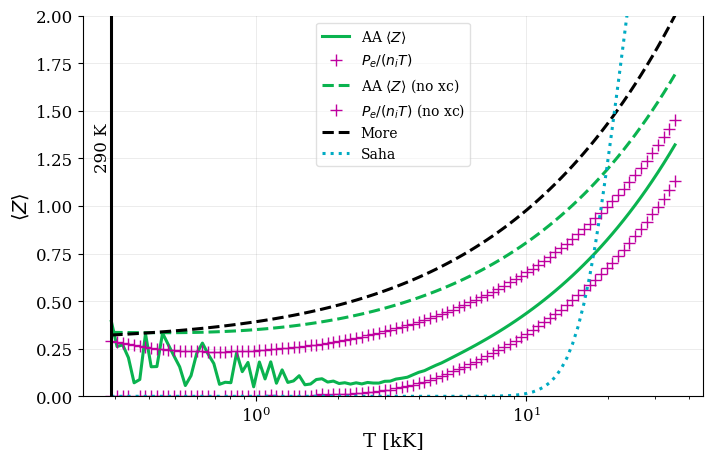

In [21]:
fig, ax = plt.subplots()

ax.plot(aa_T_array/1e3, aa_Zbar_array,'-', color=color_cycle[0], label=r"AA $\langle Z \rangle$")
Pe_over_ideal_free = aa_Pe_array/(aa_T_array*K_to_AU*aa_Zbar_array*Ar_nn_invcc*invcc_to_AU)
ax.plot(aa_T_array/1e3, Pe_over_ideal_free*aa_Zbar_array,'+',  color=color_cycle[1], label=r"$P_e/(n_i T)$")

# no xc
ax.plot(aa_noxc_T_array/1e3, aa_noxc_Zbar_array,'--', color=color_cycle[0], label=r"AA $\langle Z \rangle$ (no xc)")
Pe_noxc_over_ideal_free = aa_noxc_Pe_array/(aa_noxc_T_array*K_to_AU*aa_noxc_Zbar_array*Ar_nn_invcc*invcc_to_AU)
ax.plot(aa_noxc_T_array/1e3, Pe_noxc_over_ideal_free*aa_noxc_Zbar_array,'+', color=color_cycle[1],  label=r"$P_e/(n_i T)$ (no xc)")

ax.plot(aa_T_array/1e3, More_TF_Zbar(54, Ar_nn_invcc*invcc_to_AU, aa_T_array*K_to_AU),'--', color='k', label="More")
ax.plot(aa_T_array/1e3, saha_Zbar(aa_T_array),':', color=color_cycle[2], label="Saha")

# ax.plot(aa_T_array/1e3, np.ones_like(aa_T_array), label="Ideal for given <Z>")

ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_ylabel(r"$\langle Z\rangle$")
# ax.set_ylim(0.5,1.5)
ax.set_xlabel("T [kK]")

ax.axvline(290/1e3,color='k')
ax.text(0.25, 1.2, "290 K",rotation=90)
ax.set_ylim(0,2)

ax.legend()

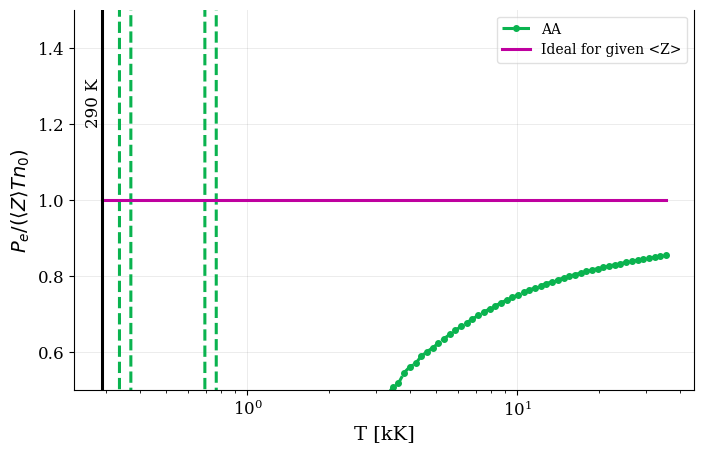

In [22]:
fig, ax = plt.subplots()


Pe_over_ideal_free = aa_Pe_array/(aa_T_array*K_to_AU*aa_Zbar_array*Ar_nn_invcc*invcc_to_AU)

ax.plot(aa_T_array/1e3, Pe_over_ideal_free,'--.', label="AA")
ax.plot(aa_T_array/1e3, np.ones_like(aa_T_array), label="Ideal for given <Z>")

ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_ylabel(r"$P_e/(\langle Z\rangle T n_0)$")
ax.set_ylim(0.5,1.5)
ax.set_xlabel("T [kK]")

ax.axvline(290/1e3,color='k')
ax.text(0.25, 1.2, "290 K",rotation=90)

ax.legend()

In [23]:
sorted_args = np.argsort(aa_Ee_array)
aa_T_array_sort, aa_Ee_array_sort = aa_T_array[sorted_args], aa_Ee_array[sorted_args]

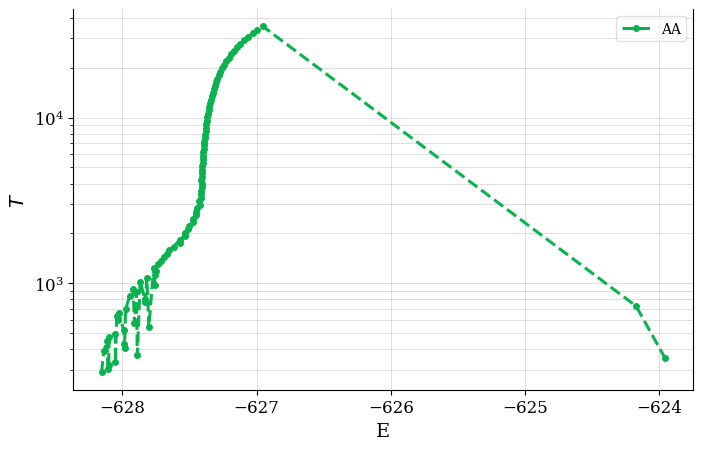

In [24]:
fig, ax = plt.subplots()

ax.plot(aa_Ee_array_sort, aa_T_array_sort,'--.', label="AA")
# ax.plot(*transposed,'--.', label="AA (no xc)")
# ax.plot(aa_T_array/1e3, 1.5*(aa_T_array-aa_T_array[0])*K_to_AU, label=r"$3/2( T-T_0)$")
n=5/3
# ax.plot(aa_T_array/1e3, (aa_T_array**n -aa_T_array[0]**n)*K_to_AU**n, label=r"$ 26 ( T^{5/3}-T_0^{5/3})$")
# ax.plot(aa_noxc_T_array/1e3, (aa_noxc_T_array**n -aa_noxc_T_array[0]**n)*K_to_AU**n, label=r"$ 26 ( T^{5/3}-T_0^{5/3})$")

# ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r"$T$")
# ax.set_ylim(0.0,10)
ax.set_xlabel("E")
ax.legend()
ax.grid(which='both', axis='both', alpha=0.2)

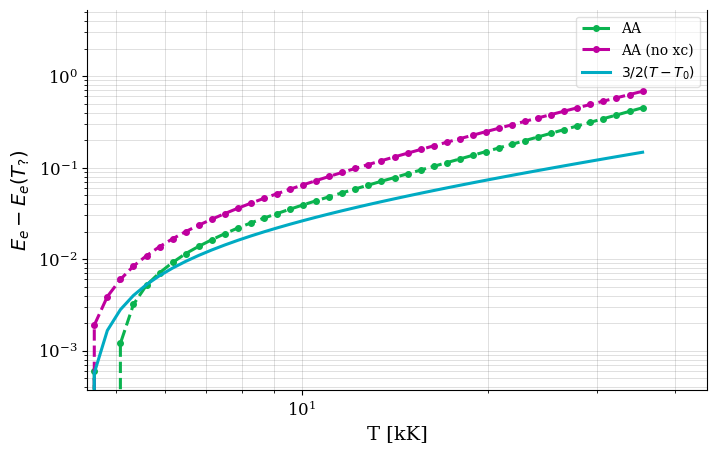

In [25]:
fig, ax = plt.subplots()

T_min = 4.5e3
ax.plot(aa_T_array/1e3, aa_Ee_array-aa_Ee_array[np.argmin(np.abs(aa_T_array-T_min))],'--.', label="AA")
ax.plot(aa_noxc_T_array/1e3, aa_noxc_Ee_array-aa_noxc_Ee_array[np.argmin(np.abs(aa_T_array-T_min))],'--.', label="AA (no xc)")
ax.plot(aa_T_array/1e3, 1.5*(aa_T_array-T_min)*K_to_AU, label=r"$3/2( T-T_0)$")
n=5/3
# ax.plot(aa_T_array/1e3, (aa_T_array**n -aa_T_array[0]**n)*K_to_AU**n, label=r"$ 26 ( T^{5/3}-T_0^{5/3})$")
# ax.plot(aa_noxc_T_array/1e3, (aa_noxc_T_array**n -aa_noxc_T_array[0]**n)*K_to_AU**n, label=r"$ 26 ( T^{5/3}-T_0^{5/3})$")

ax.set_xscale('log')
ax.set_yscale('log')#, linthresh=1e-6)
ax.set_ylabel(r"$E_e - E_e(T_?)$")
# ax.set_ylim(0.0,10)
ax.set_xlim(T_min/1e3,None)
ax.set_xlabel("T [kK]")
ax.legend()
ax.grid(which='both', axis='both', alpha=0.2)

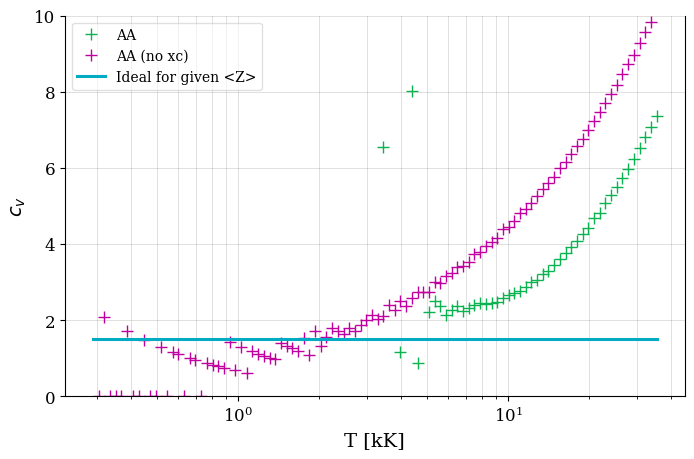

In [26]:
c_v = (aa_Ee_array[1:]-aa_Ee_array[:-1])*AU_to_K/(aa_T_array[1:]-aa_T_array[:-1])#/aa_Zbar_array[0:-1]
c_v_noxc = (aa_noxc_Ee_array[1:]-aa_noxc_Ee_array[:-1])*AU_to_K/(aa_noxc_T_array[1:]-aa_noxc_T_array[:-1])#/aa_Zbar_array[0:-1]


fig, ax = plt.subplots()

ax.plot(aa_T_array[1:]/1e3, c_v,'+', label="AA")
ax.plot(aa_noxc_T_array[1:]/1e3, c_v_noxc,'+', label="AA (no xc)")
ax.plot(aa_T_array/1e3, 1.5*np.ones_like(aa_T_array), label="Ideal for given <Z>")

ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_ylabel(r"$c_v$")
ax.set_ylim(0.0,10)
ax.set_xlabel("T [kK]")

ax.legend()
ax.grid(which='both', axis='both', alpha=0.2)

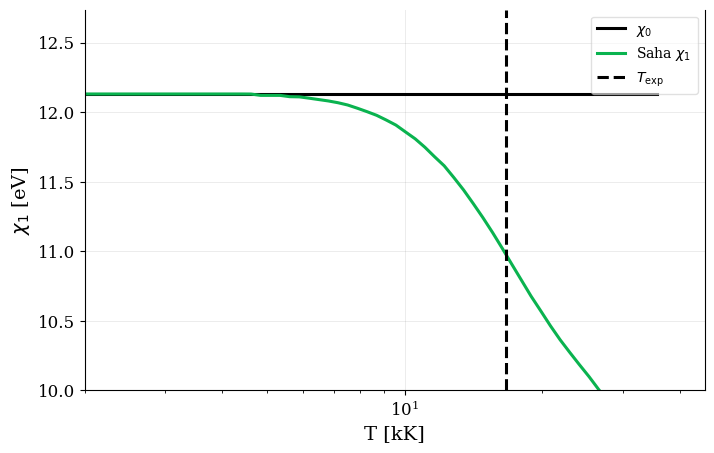

In [27]:
fig, ax = plt.subplots()

ax.plot(aa_T_array/1e3, χ0_eV*np.ones_like(aa_T_array),'k-', label=r"$\chi_0$")
ax.plot(aa_T_array/1e3, saha_χ(aa_T_array)*J_to_AU*AU_to_eV,'-', color=color_cycle[0], label=r"Saha $\chi_1$ ")

# ax.plot(aa_T_array/1e3, np.ones_like(aa_T_array), label="Ideal for given <Z>")

ax.axvline(Xe_TK_peak/1e3, color='k', linestyle='--', label=r'$T_{\rm exp}$')
ax.set_xscale('log')
# # ax.set_yscale('log')
ax.set_ylabel(r"$\chi_1$ [eV]")
# # ax.set_ylim(0.5,1.5)
ax.set_xlabel("T [kK]")

# ax.axvline(290/1e3,color='k')
# ax.text(0.25, 1.2, "290 K",rotation=90)
ax.set_xlim(2,None)
ax.set_ylim(10,None)

ax.legend()